In [36]:
import csv
import matplotlib.pyplot as plt
from params import WIND_MAGS, VALID_TRAJS, VALID_WINDS
import pandas as pd

In [37]:
DATA_DIR = "data/"
NAMES = ["pd", "nf"]

data = {}
filenames = []
for name in NAMES:
    for traj in VALID_TRAJS:
        for wind_mag in WIND_MAGS:
            for wind in VALID_WINDS:
                filename = f"{DATA_DIR}{name}_{traj}_NF_{wind_mag}wind{wind}.csv"
                data[filename]=pd.read_csv(filename)
                filenames.append(filename)

In [38]:
data[filenames[0]].head()

,Unnamed: 0,t,p,p_d,v,v_d,q,R,w,T_sp,q_sp,hover_throttle,fa,pwm
0,1,0.005,"[1.0, 0.0, 0.0]","[1.0, 0.0, 1.0]","[0.015, 0.0, 0.05000000000000003]","[200.0, 0.0, 200.0]","[1.0, 0.0, 0.0, 0.0]","[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...","[0.0, 0.0, 0.0]",NaN,NaN,NaN,"[3, 0, 0]","[70.37400088100719, 70.37400088100719, 70.3740..."
1,2,0.010,"[1.000075, 0.0, 0.00025000000000000017]","[0.9999950652018582, 0.006283143965558951, 1.0]","[0.03, 0.0, 0.09875000000000003]","[-0.0009869596283573756, 1.25662879311179, 0.0]","[1.0, 0.0, 0.0, 0.0]","[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...","[-0.06424422257135984, -0.07673685406514023, 0.0]",NaN,NaN,NaN,"[3, 0, 0]","[72.6201368101555, 72.18878799963883, 67.12909..."
2,3,0.015,"[1.0002250000000001, 0.0, 0.0007437500000000003]","[0.9999802608561371, 0.012566039883352607, 1.0]","[0.045, 0.0, 0.14626875000000003]","[-0.002960869144219558, 1.2565791835587312, 0.0]","[0.9999999687004236, -0.00016061055140135724, ...","[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...","[-0.13012027804986193, -0.15630474459114568, 1...",NaN,NaN,NaN,"[3, 0, 0]","[72.29299380043703, 71.81794885258496, 66.5627..."
3,4,0.020,"[1.00045, 0.0, 0.0014750937500000005]","[0.9999555871089498, 0.018848439715408175, 1.0]","[0.059963413089869806, 3.063062235529173e-05, ...","[-0.00493474943745742, 1.2564799664111135, 0.0]","[0.9999997122314703, -0.0004859111735364876, -...","[[0.9999999263931949, 6.162374029224125e-08, -...","[-0.19122167606581061, -0.23108801782099603, -...",NaN,NaN,NaN,"[3, 0, 0]","[71.70586104810744, 71.22762794480465, 66.2864..."
4,5,0.025,"[1.0007498170654494, 1.5315311177645864e-07, 0...","[0.9999210442038161, 0.02513009544333748, 1.0]","[0.07485369162447002, 0.0001221420003130048, 0...","[-0.006908581026743299, 1.2563311455858608, 0.0]","[0.9999988622098749, -0.0009639649545968537, -...","[[0.9999993211453841, 5.654792926808904e-07, -...","[-0.24723977173985023, -0.30066713042566995, -...",NaN,NaN,NaN,"[3, 0, 0]","[71.10567499699204, 70.62891483206866, 66.0320..."


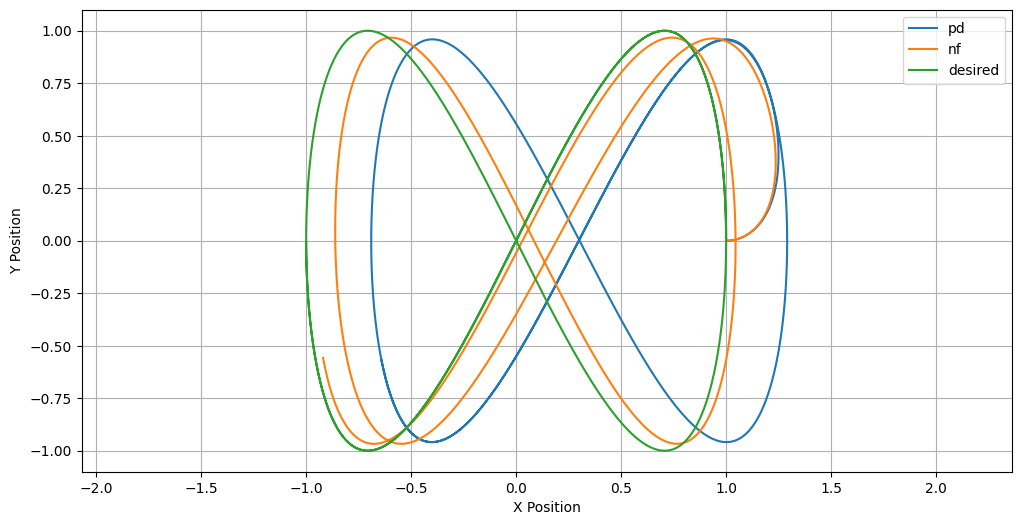

In [39]:
plt.figure(figsize=(12, 6))

# Plot complete trajectory from first file (synth-fly)
for i, filename in enumerate(filenames):
    df = data[filename]
    x = [eval(p)[0] for p in df['p']]
    y = [eval(p)[1] for p in df['p']]
    plt.plot(x, y, label=NAMES[i])

df1 = data[filenames[0]]
xd = [eval(p)[0] for p in df1['p_d']]
yd = [eval(p)[1] for p in df1['p_d']]
plt.plot(xd, yd, label='desired')

plt.xlabel('X Position')
plt.ylabel('Y Position')
# plt.title('Trajectory Comparison: Neural-Fly vs PD Controller')
plt.xlim(-1.5, 1.5)
plt.axis('equal')
plt.legend()
plt.grid(True)

In [40]:
import numpy as np

# Get the first dataset (Neural-Fly)
df_nf = data[filenames[0]]
# Get the second dataset (PD)
df_pd = data[filenames[1]]

# Calculate MSE for NF
nf_p = np.array([eval(p) for p in df_nf['p']])
nf_pd = np.array([eval(p) for p in df_nf['p_d']])
nf_mse = np.mean(np.sum((nf_p - nf_pd) ** 2, axis=1))

# Calculate MSE for PD
pd_p = np.array([eval(p) for p in df_pd['p']])
pd_pd = np.array([eval(p) for p in df_pd['p_d']])
pd_mse = np.mean(np.sum((pd_p - pd_pd) ** 2, axis=1))

print(f"Neural-Fly MSE: {nf_mse:.6f}")
print(f"PD MSE: {pd_mse:.6f}")

Neural-Fly MSE: 0.369842
PD MSE: 0.268937
